# Business Case

### Business Case is To create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly

In [1]:
# Importing Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_excel('Flight_Fare.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.shape

(10683, 11)

In [6]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# Domain Analysis

**Airline:** This feature represents the airline company providing the flight service. Different airlines have varying levels of service, amenities, and pricing. Some airlines might be known for their budget-friendly options, while others might offer premium services.

    
**Date_of_Journey:** This feature indicates the date of the flight journey. The date can be helpful in capturing seasonal patterns, day-of-week effects, and holiday-related variations in flight prices.

    
**Source:** The source refers to the departure location of the flight. Understanding the source can provide insights into the popularity of different airports and their impact on ticket prices.

    
**Destination:** This feature represents the arrival location of the flight. The destination can also influence flight prices, as some locations might be more popular or in higher demand than others.

    
**Route:** The route describes the path taken by the flight, including any layovers or stopovers. Longer routes or those with more stops might lead to higher ticket prices.

    
**Dep_Time:** Dep_Time stands for the departure time of the flight. The time of day can affect ticket prices, with peak hours or desirable departure times often being more expensive.

    
**Arrival_Time:** Arrival_Time indicates the time of arrival at the destination. Similar to departure time, arrival time can also influence ticket prices based on traveler preferences.

    
**Duration:** Duration represents the total time taken for the flight journey. Longer flights, especially those with multiple stops, may have higher prices.

    
**Total_Stops:** This feature denotes the total number of stops in the flight journey. Non-stop or direct flights are generally more convenient and may be priced differently from flights with layovers.

    
**Additional_Info:** Additional_Info include supplementary details about the flight, such as In-flight meal not included, No check-in baggage included, Long layover, change airports and Business. In most of the records there is No info.

    
**Price:** Price is the target variable that we want to predict. It represents the flight ticket price. This is the value we want the regression model to estimate based on the other features in the dataset.

# Exploratory data Analysis

In [8]:
data1 = data.drop('Date_of_Journey',axis=1)

In [9]:
data1

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

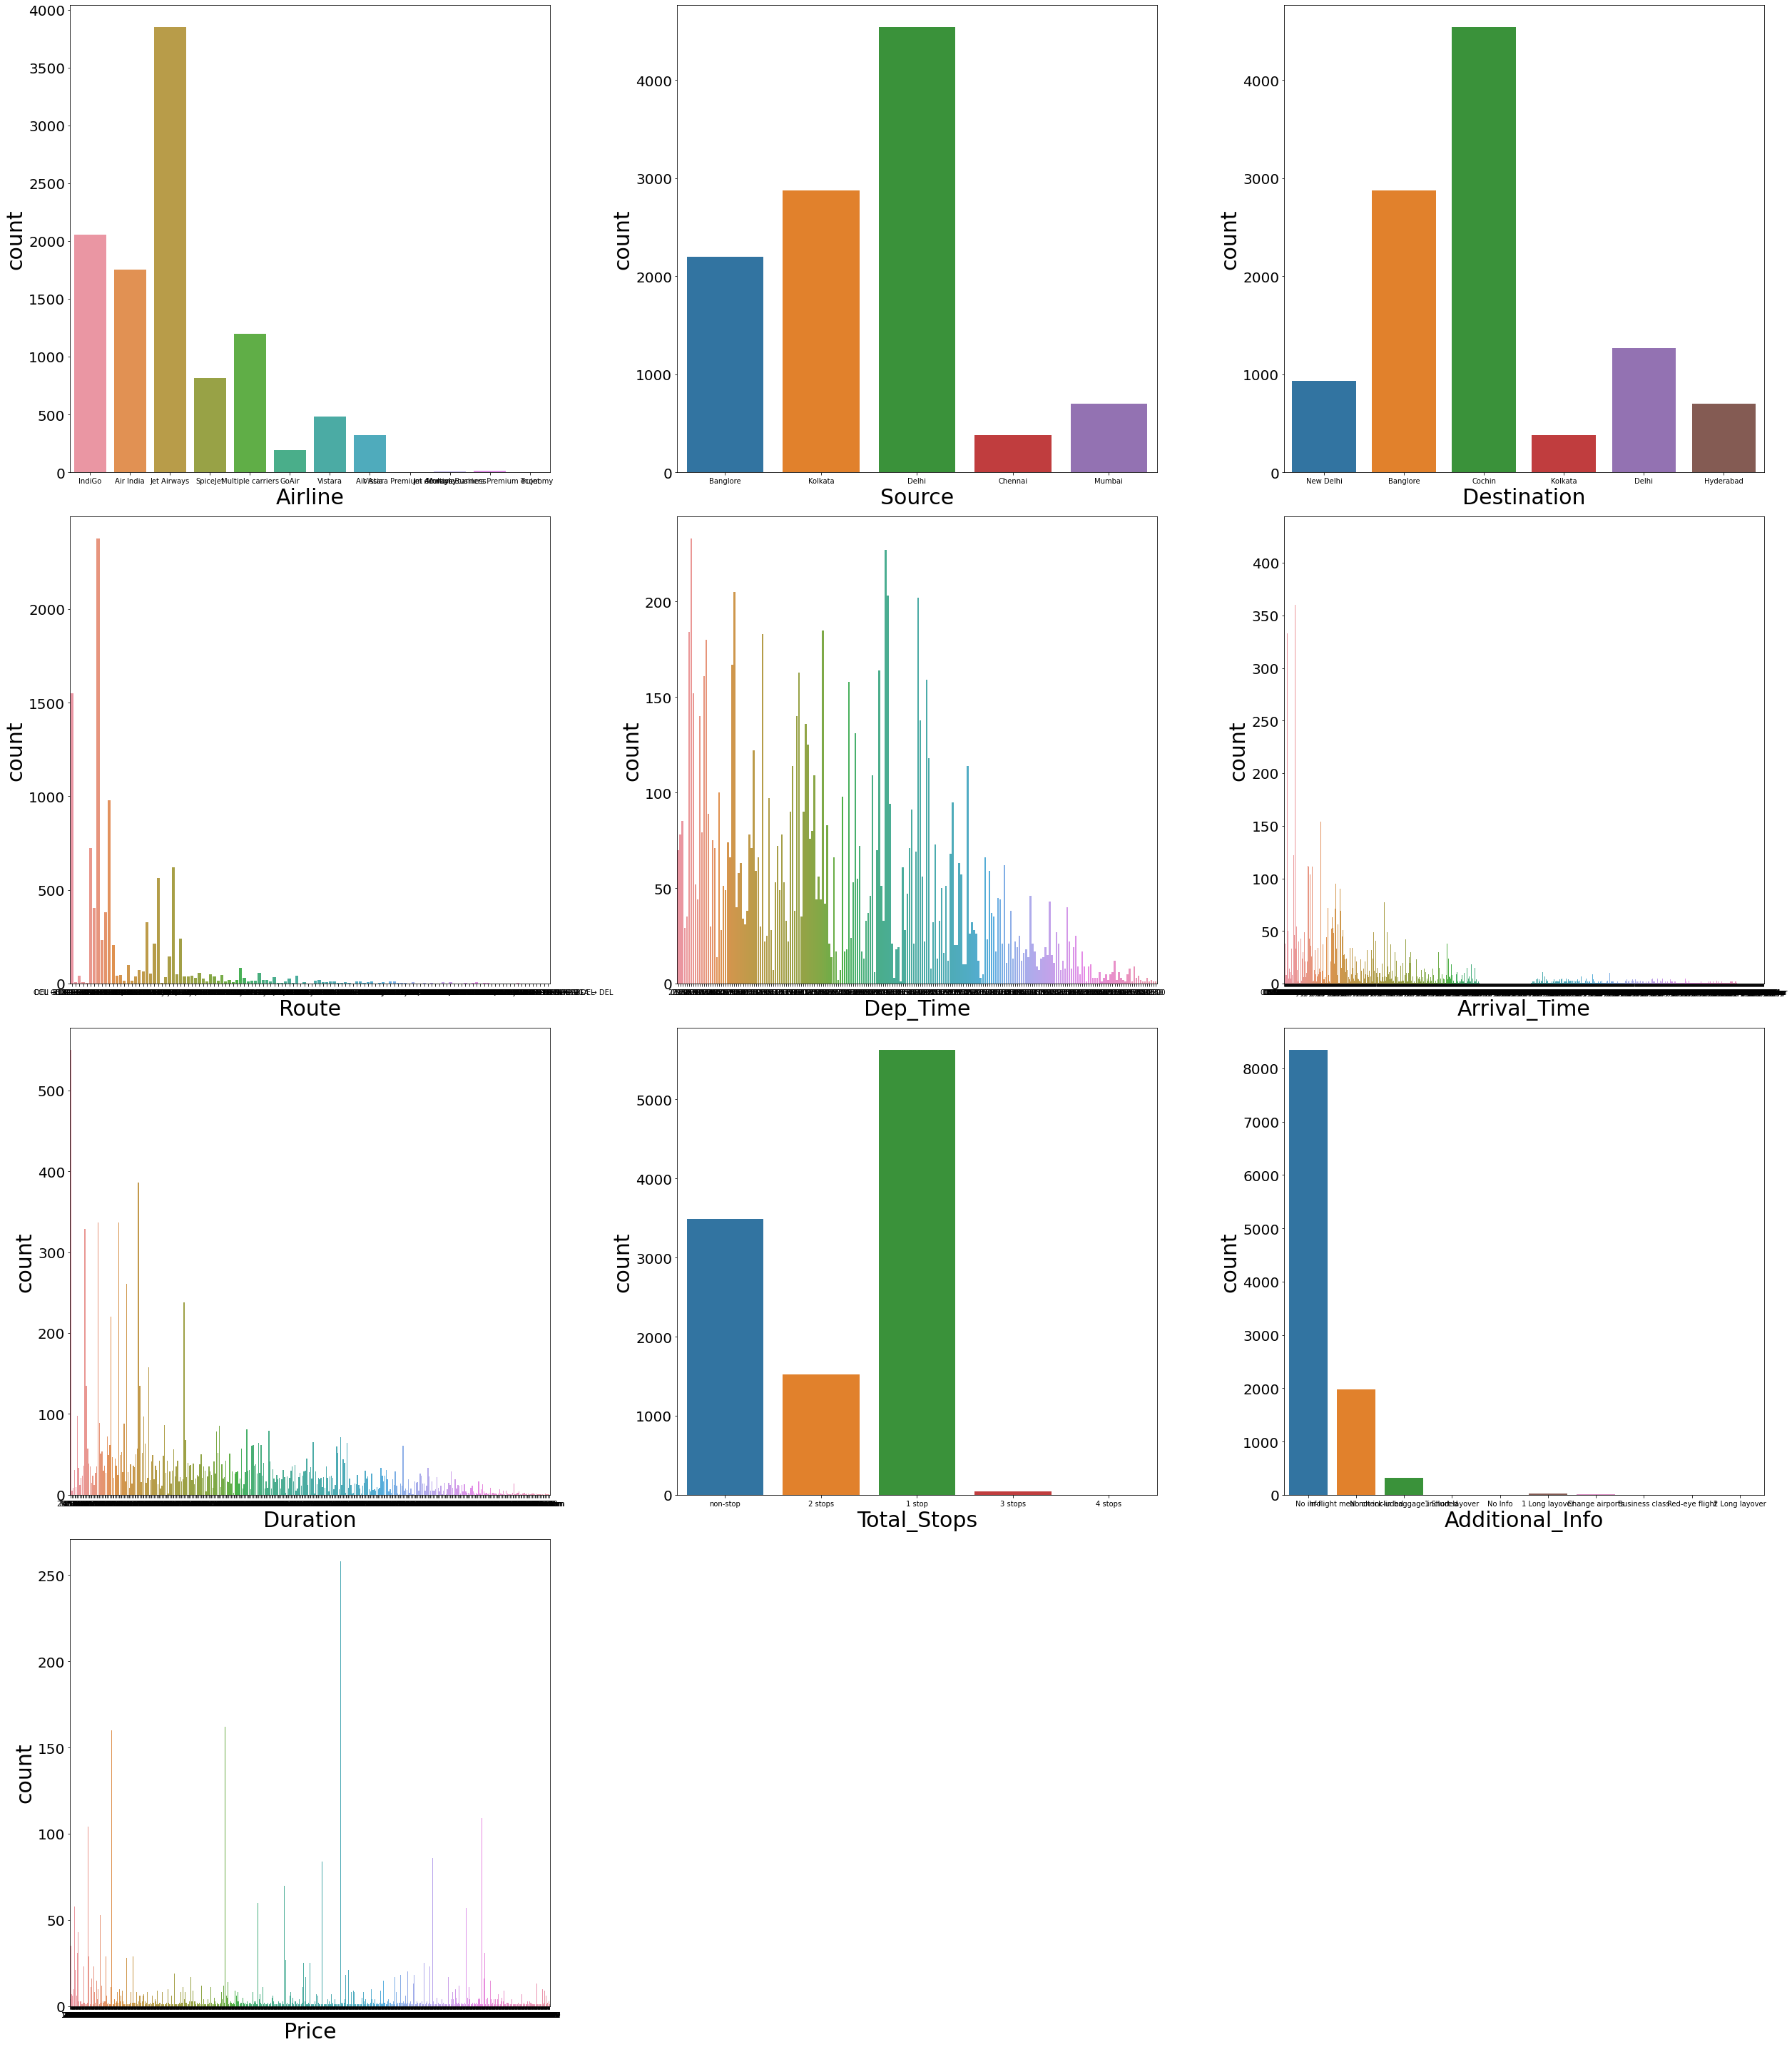

In [11]:
plt.figure(figsize=(35,40),facecolor='white')
plotnumber=1
for column in data1:
    ax = plt.subplot(4,3,plotnumber)
    sns.countplot(x=column,data = data1)
    plt.ylabel('count',fontsize=30)
    plt.xlabel(column,fontsize=30)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Insights

**Airline**: Jet Airways has the highest number of records and it is also considered as most frequently travelling airline, Second is Indigo, third is AirIndia and so on.


**Source**: From Delhi most people are travelling, Second is Kolkata and third is Banglore
* From Delhi to anywhere Price may increase.

**Destination**: Cochin is the Maximum number of peopels destination, Second is Banglore and third is Delhi. Kolkata is the less number of peoples's destination. 
* More number of prople are travelling to Cochin, so from anywhere to cochin price may increase


**Total Stops**: Maximum number of records contains Flights have atleast one stop, second is NonStop and third is twoStop. Very few flights have 3 stops to reach the destination.


**Additional Info**: In Maximum records there is No additional info, in some records they have mentioned some info like In-flight meal not included,No check-in baggage included and about layover etc

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


* There is only one numerical feature is present in the dataset. Which is Price
* Rest of all 10 Features are objects.
* I need to convert them into integers

## Data Pre-processing

In [15]:
# Checking for duplicate records
data.duplicated().sum()

220

**There are 220 Duplicate records are present in the dataset**

In [16]:
# dropping the duplicate records
data.drop_duplicates(inplace=True)

In [17]:
# checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* There are 2 null values present in the dataset
* One null value in Route Feature and another in Total stops.

In [18]:
# dropping null records
data.dropna(inplace=True)

## **Converting Categorical data**

### 1. Airline

In [19]:
Airline = data[['Airline']]

In [20]:
# applying One Hot Encoding for Airline Feature
Airline = pd.get_dummies(data['Airline'],drop_first=True)

In [21]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [22]:
data = pd.concat([data,Airline],axis=1)

In [23]:
data.drop('Airline',axis=1,inplace=True)

### 2. Date_of_Journey

In [24]:
# Extracting Journey day from Date of Journey feature
data['Journey_day'] = pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [25]:
# Extracting Journey Month from Date of Journey feature
data['Journey_month'] = pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [26]:
# Since we have extracted Day and Month from Date_of_Journey Feature 
# now dropping Date_of_Journey column.
data.drop('Date_of_Journey',axis=1,inplace=True)

### 3. Source

In [27]:
data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
# Applying One Hot Encoding to Source feature
Source = pd.get_dummies(data.Source, drop_first = False)

In [29]:
Source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [30]:
# Renaming the column names because in destination also there will be same feature name.
Source.rename(columns = {'Chennai':'Source_Channai','Delhi':'Source_Delhi','Kolkata':'Source_Kolkata', 'Mumbai':'Source_Mumbai','Banglore':'Source_Banglore'},inplace=True)

In [31]:
Source

,Source_Banglore,Source_Channai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [32]:
# we have already extracted values through one hot encoding from source
# now we can drop the source column
data.drop('Source',axis=1,inplace=True)

### 4. Destination

In [33]:
data['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
# Applying One Hot Encoding to Destination feature
Destination = pd.get_dummies(data.Destination, drop_first = True)

In [35]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [36]:
data = pd.concat([data,Source,Destination],axis=1)

In [37]:
data.head()

,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Air India,GoAir,...,Source_Banglore,Source_Channai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,...,0,0,1,0,0,1,0,0,0,0
3,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
# we have already extracted values through one hot encoding from Destination column
# now we can drop the Destination column
data.drop('Destination',axis=1, inplace=True)

### 5.Dep_Time 

In [39]:
# Extracting Hours from Dep_Time feature
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour

In [40]:
# Extracting Minutes from Dep_Time feature
data['Dep_Min'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [41]:
# we have extracted hour and minute from Dep_Time
# now we can drop it
data.drop('Dep_Time',axis=1,inplace=True)

### 6. Arrival_Time

In [42]:
# Extracting Hours from Arrival_Time feature
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

In [43]:
# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

### 7. Duration

In [44]:
data.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,BLR → DEL,2h 50m,non-stop,No info,3897,0,0,1,0,0,...,0,0,0,0,0,1,22,20,1,10
1,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,0,0,0,0,...,0,0,0,0,0,0,5,50,13,15
2,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,0,0,0,1,0,...,0,1,0,0,0,0,9,25,4,25
3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,0,0,1,0,0,...,0,0,0,0,0,0,18,5,23,30
4,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,0,0,1,0,0,...,0,0,0,0,0,1,16,50,21,35


In [45]:
# extracting hours and minutes from Duration feature
data['Duration_hours'] = data['Duration'].str.extract('(\d+)h', expand=False).fillna(0).astype(int)
data['Duration_minutes'] = data['Duration'].str.extract('(\d+)m', expand=False).fillna(0).astype(int)

In [46]:
data.drop('Duration',axis=1,inplace=True)

In [47]:
data.head(3)

,Route,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,BLR → DEL,non-stop,No info,3897,0,0,1,0,0,0,...,0,0,0,1,22,20,1,10,2,50
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,0,0,0,0,0,...,0,0,0,0,5,50,13,15,7,25
2,DEL → LKO → BOM → COK,2 stops,No info,13882,0,0,0,1,0,0,...,0,0,0,0,9,25,4,25,19,0


### 8. Totla_Stops

In [48]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [49]:
# Manual Encoding
# assigning specific values, we have given larger value to '1 stop' because it has highest number of records
# similarly we have given for other unique values also
data['Total_Stops'] = data['Total_Stops'].map({'1 stop':4,'non-stop':3,'2 stops':2,'3 stops':1,'4 stops':0})

### 9. Additional_Info

In [50]:
data['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [51]:
# Manual Encoding
# assigning specific values, we have given zero value to 'No info' because it has highest number of records and
# also it does't provide any valueble information so we didn't given importance to that unique value
# similarly according to information from the unique values we have provided the values to them
data['Additional_Info'] = data['Additional_Info'].map({'No info':0,'In-flight meal not included':1,
                                                      'No check-in baggage included':2,'1 Long layover':3,
                                                      'Change airports':4,'Business class':5,'No Info':0,
                                                      '1 Short layover':6,'Red-eye flight':6,'2 Long layover':6})

### 10. Price

<AxesSubplot:xlabel='Price'>

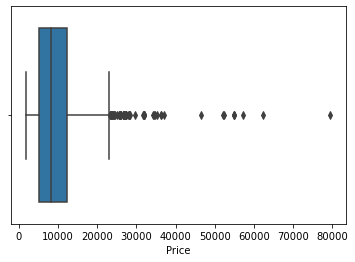

In [52]:
sns.boxplot(data['Price'])

In [53]:
data.loc[data['Price']>40000]

,Route,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
657,BLR → BOM → DEL,4,0,52229,0,0,0,0,1,0,...,0,0,0,1,5,45,10,45,5,0
1478,BLR → BOM → DEL,4,0,54826,0,0,0,1,0,0,...,0,0,0,1,18,40,0,45,6,5
2618,BLR → BOM → DEL,4,0,54826,0,0,0,1,0,0,...,0,0,0,1,22,50,5,5,6,15
2924,BLR → BOM → DEL,4,5,79512,0,0,0,0,1,0,...,0,0,0,1,5,45,11,25,5,40
5372,BLR → BOM → DEL,4,5,62427,0,0,0,0,1,0,...,0,0,0,1,5,45,12,25,6,40
5439,BLR → BOM → DEL,4,0,54826,0,0,0,1,0,0,...,0,0,0,1,16,55,23,0,6,5
7351,DEL → ATQ → BOM → COK,2,0,46490,0,0,0,0,1,0,...,0,0,0,0,20,5,4,25,8,20
9715,DEL → ATQ → BOM → COK,2,0,52285,0,0,0,0,1,0,...,0,0,0,0,20,5,4,25,8,20
10364,BLR → MAA → DEL,4,5,57209,0,0,0,0,1,0,...,0,0,0,1,9,45,14,25,4,40


In [54]:
data['Price'].mean()

9026.790288663735

In [55]:
# it's very rare to have a ticket price above 40000, even mean of the price is 9026
# so we replacing record's Price have above 40000 price to mean of the price
data.loc[data['Price']>40000, 'Price'] = 9026.79

In [56]:
data.loc[data['Price'] > 40000]

,Route,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes


In [57]:
data.head()

,Route,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,BLR → DEL,3,0,3897.0,0,0,1,0,0,0,...,0,0,0,1,22,20,1,10,2,50
1,CCU → IXR → BBI → BLR,2,0,7662.0,1,0,0,0,0,0,...,0,0,0,0,5,50,13,15,7,25
2,DEL → LKO → BOM → COK,2,0,13882.0,0,0,0,1,0,0,...,0,0,0,0,9,25,4,25,19,0
3,CCU → NAG → BLR,4,0,6218.0,0,0,1,0,0,0,...,0,0,0,0,18,5,23,30,5,25
4,BLR → NAG → DEL,4,0,13302.0,0,0,1,0,0,0,...,0,0,0,1,16,50,21,35,4,45


In [58]:
data.isnull().sum()

Route                                0
Total_Stops                          0
Additional_Info                      0
Price                                0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Journey_day                          0
Journey_month                        0
Source_Banglore                      0
Source_Channai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                  

## Feature Engineering

## 11. Route 

In [59]:
# Since we have Source, Destination and No of stops from source to destination.
# So we can drop the Route
data.drop('Route',axis=1,inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10462 non-null  int64  
 1   Additional_Info                    10462 non-null  int64  
 2   Price                              10462 non-null  float64
 3   Air India                          10462 non-null  uint8  
 4   GoAir                              10462 non-null  uint8  
 5   IndiGo                             10462 non-null  uint8  
 6   Jet Airways                        10462 non-null  uint8  
 7   Jet Airways Business               10462 non-null  uint8  
 8   Multiple carriers                  10462 non-null  uint8  
 9   Multiple carriers Premium economy  10462 non-null  uint8  
 10  SpiceJet                           10462 non-null  uint8  
 11  Trujet                             10462 non-null  uin

### Plotting Heatmap to check Correlation

<AxesSubplot:>

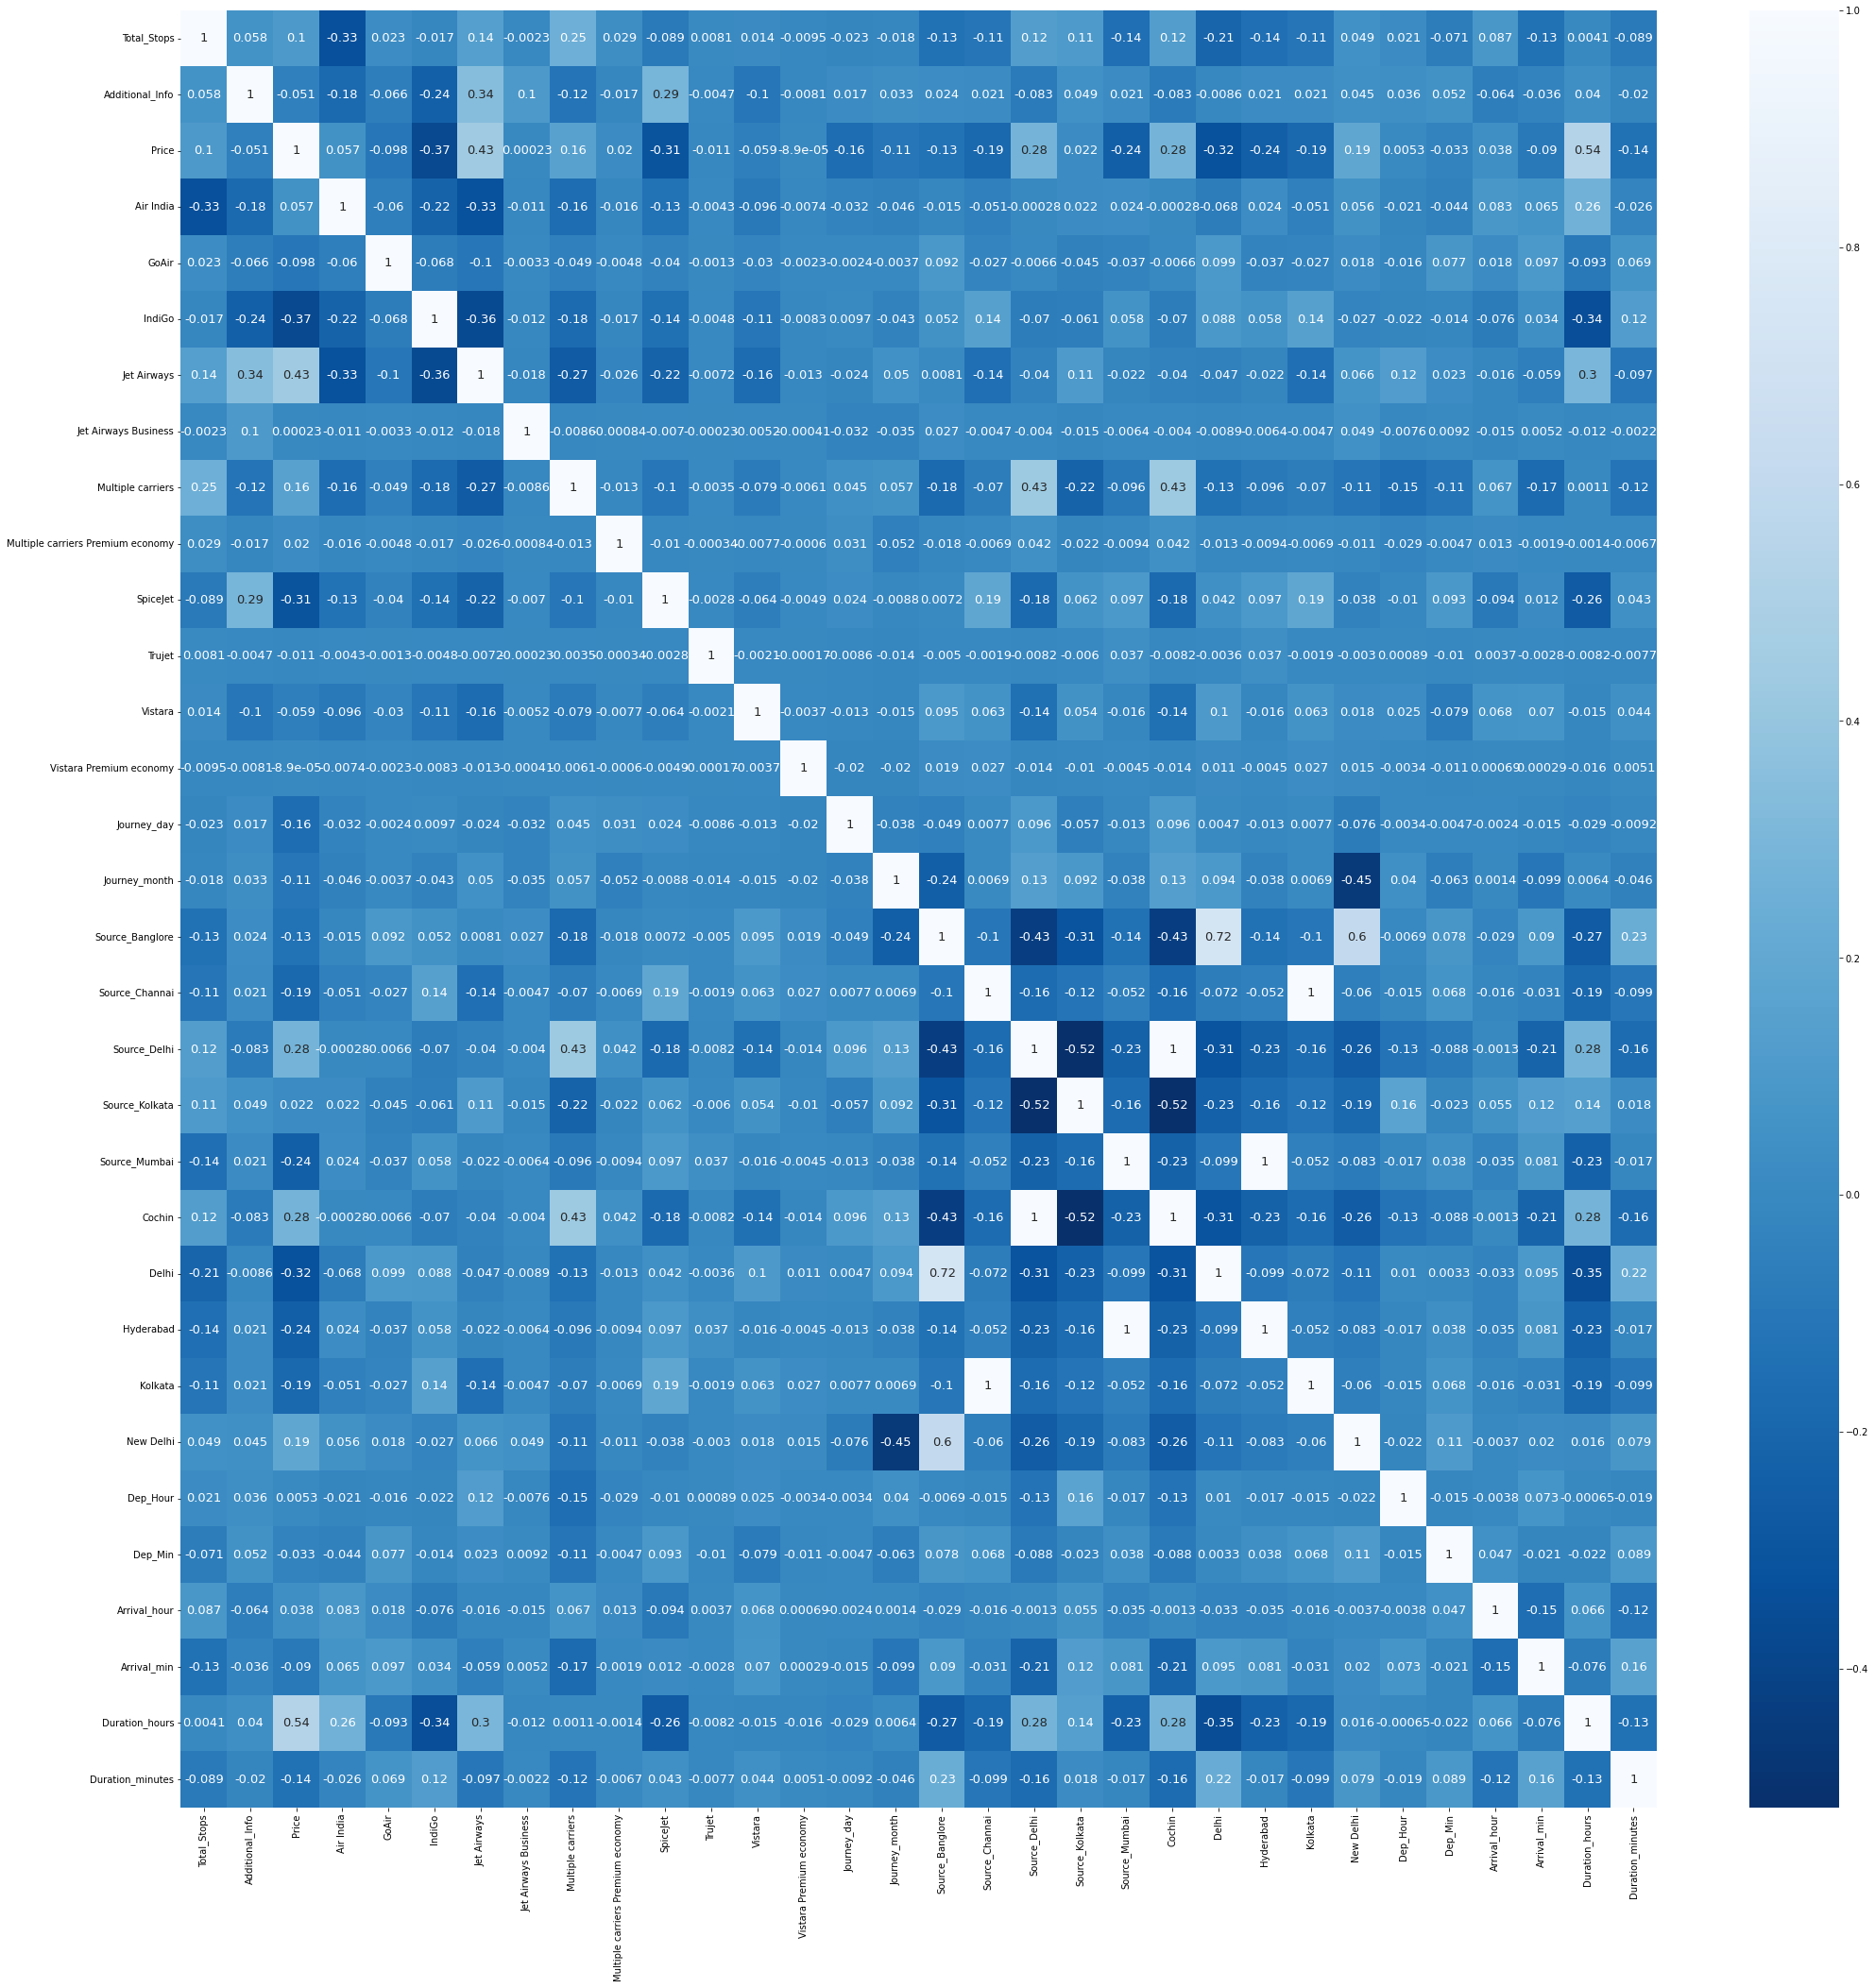

In [61]:
plt.figure(figsize=(35,35),facecolor='white')
sns.heatmap(data.corr(),cmap = 'Blues_r',annot = True, annot_kws = {'size': 13})

### Insights from Heatmap

* Here Cochin is highly correlated to Source chennai or vice versa


* Hyderabad is highly correlated to Source Mumbai or vice versa

 
* Coching is highly correlated to Source Delhi or vice versa

**In this case, we don't have to drop either feature because they are not duplicate or redundant features, 
but rather they represent different categories for the same information. 
It's just that the names of the features in our DataFrame are not consistent with the labels we provided.**

**The correlation of 1 between these features is expected and indicates a consistent relationship between 'Source' and 'Destination' categories.**

In [125]:
data.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Journey_day', 'Journey_month',
       'Source_Banglore', 'Source_Channai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

# Model Creation

In [62]:
data.head()

,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,3,0,3897.0,0,0,1,0,0,0,0,...,0,0,0,1,22,20,1,10,2,50
1,2,0,7662.0,1,0,0,0,0,0,0,...,0,0,0,0,5,50,13,15,7,25
2,2,0,13882.0,0,0,0,1,0,0,0,...,0,0,0,0,9,25,4,25,19,0
3,4,0,6218.0,0,0,1,0,0,0,0,...,0,0,0,0,18,5,23,30,5,25
4,4,0,13302.0,0,0,1,0,0,0,0,...,0,0,0,1,16,50,21,35,4,45


In [63]:
data.shape

(10462, 32)

In [64]:
data.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Journey_day', 'Journey_month',
       'Source_Banglore', 'Source_Channai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

### Creating independent and dependent features

In [65]:
x = data.drop('Price',axis=1)

In [66]:
x

,Total_Stops,Additional_Info,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,22,20,1,10,2,50
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,5,50,13,15,7,25
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,9,25,4,25,19,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,18,5,23,30,5,25
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,19,55,22,25,2,30
10679,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,20,45,23,20,2,35
10680,3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,8,20,11,20,3,0
10681,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,11,30,14,10,2,40


In [67]:
y= data.Price

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=44,test_size = 0.2)

## Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

In [75]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from scipy import math

In [76]:
r2 = r2_score(y_test,y_pred)
r2

0.5656980109812226

In [77]:
print("r2score:", r2_score(y_test,y_pred))
print("mse:", mean_squared_error(y_test,y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred)))
print("mae:", mean_absolute_error(y_test,y_pred))

r2score: 0.5656980109812226
mse: 8063692.904373257
rmse: 2839.664223878108
mae: 2038.9859705215708


## SVR

In [78]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
# y_pred_svctrain = svc.predict(x_train)

In [79]:
r2_svr = r2_score(y_test,y_pred_svr)
r2_svr
#7
# 12

0.012507620649873985

In [80]:
print("r2score:", r2_score(y_test,y_pred_svr))
print("mse:", mean_squared_error(y_test,y_pred_svr))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("mae:", mean_absolute_error(y_test,y_pred_svr))

r2score: 0.012507620649873985
mse: 18334788.911464084
rmse: 4281.914164420404
mae: 3410.799119550803


## KNN

In [81]:
from sklearn.neighbors import KNeighborsRegressor
error_rate = []
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [82]:
error_rate

[0.7706641184902054,
 0.9149546106067845,
 0.959866220735786,
 0.9732441471571907,
 0.9827998088867654,
 0.989010989010989,
 0.9928332537028189,
 0.9961777353081701,
 0.9971333014811276,
 0.9995222169135213]

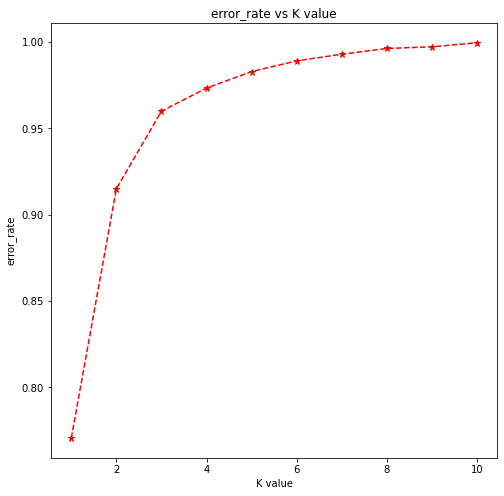

In [83]:
# plotting K value and error rate
plt.figure(figsize=(8,8))
plt.plot(range(1,11),error_rate,color='red',marker='*',markerfacecolor = 'green', linestyle = 'dashed',markersize=7)
plt.title('error_rate vs K value')
plt.xlabel('K value')
plt.ylabel('error_rate')
plt.show()

In [84]:
KNN = KNeighborsRegressor(n_neighbors = 3)
KNN.fit(x_train,y_train)
y_pred_knn = KNN.predict(x_test)

In [85]:
r2_svr = r2_score(y_test,y_pred_knn)
r2_svr

0.611426206536356

In [86]:
print("r2score:", r2_score(y_test,y_pred_knn))
print("mse:", mean_squared_error(y_test,y_pred_knn))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("mae:", mean_absolute_error(y_test,y_pred_knn))

r2score: 0.611426206536356
mse: 7214656.668410314
rmse: 2686.0112934256836
mae: 1742.1886653925783


# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)

In [88]:
r2_dtr = r2_score(y_test,y_pred_dtr)
r2_dtr

0.8320594513908048

In [89]:
print("r2score:", r2_score(y_test,y_pred_dtr))
print("mse:", mean_squared_error(y_test,y_pred_dtr))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_dtr)))
print("mae:", mean_absolute_error(y_test,y_pred_dtr))

r2score: 0.8320594513908048
mse: 3118155.210930817
rmse: 1765.8298929769019
mae: 737.9048829431438


## Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_predrf = reg_rf.predict(x_test)

In [91]:
r22 = r2_score(y_test,y_predrf)

In [92]:
r22

0.8963064657792134

In [93]:
print("r2score:", r2_score(y_test,y_predrf))
print("mse:", mean_squared_error(y_test,y_predrf))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_predrf)))
print("mae:", mean_absolute_error(y_test,y_predrf))

r2score: 0.8963064657792134
mse: 1925279.7299286402
rmse: 1387.544496558089
mae: 656.6997368822


## Hyperparameter tuning for Decision Tree

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {
    'max_depth': (list(range(1,11))),
    'splitter': ('best','random'),
    'min_samples_split': (list(range(1,11))),
    'min_samples_leaf': (list(range(1,11))),
    'max_features': ['auto','sqrt','log2']
}

dtr_ = DecisionTreeRegressor(random_state=42)

dtr_grid = GridSearchCV(dtr_,param_grid,verbose=2,n_jobs=-1,cv=5,scoring='r2')

dtr_grid.fit(x_train,y_train)

best_parameters = dtr_grid.best_params_

print('Best paramteres:',best_parameters)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits
Best paramteres: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


In [96]:
model2 = DecisionTreeRegressor(criterion= "squared_error",max_depth= 10, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 4, splitter= 'best')

In [97]:
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)

In [98]:
r2_grid = r2_score(y_test,y_pred_model2)
r2_grid

0.8639287544022339

In [99]:
print("r2score:", r2_score(y_test,y_pred_model2))
print("mse:", mean_squared_error(y_test,y_pred_model2))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_model2)))
print("mae:", mean_absolute_error(y_test,y_pred_model2))

r2score: 0.8639287544022339
mse: 2526437.284100251
rmse: 1589.477047365029
mae: 898.3494890674604


## Hyperparameter tuning for random forest

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
param_grid = {
    'n_estimators':[400,600,800,1000,1200,1400,1600,1800,2000,2200],
    'max_depth':(list(range(1,13))),
    'min_samples_split':(list(range(1,9))),
    'min_samples_leaf':(list(range(1,11))),
    'max_features':['auto','sqrt'],
    'bootstrap':[True,False]}

rfc_ = RandomForestRegressor(random_state = 43)

model1 = RandomizedSearchCV(rfc_,param_grid,verbose=2,cv=3,n_jobs=-1,n_iter = 100,scoring='r2')

model1.fit(x_train,y_train)

best_parameters1 = model1.best_params_

print('best parameters:',best_parameters1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best parameters: {'n_estimators': 800, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 12, 'bootstrap': True}


In [102]:
model_1 = RandomForestRegressor(n_estimators= 400, min_samples_split= 4, min_samples_leaf= 2, max_features= 'auto', max_depth= 12, bootstrap= True)
model_1.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=400)

In [103]:
y_pred_model_1 = model_1.predict(x_test)

In [104]:
r2_grid = r2_score(y_test,y_pred_model_1)
r2_grid

0.8934937543436514

In [105]:
print("r2score:", r2_score(y_test,y_pred_model_1))
print("mse:", mean_squared_error(y_test,y_pred_model_1))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_model_1)))
print("mae:", mean_absolute_error(y_test,y_pred_model_1))

r2score: 0.8934937543436514
mse: 1977503.3941495502
rmse: 1406.2373178626538
mae: 743.5858233542561


## Using Bagging for Decision Tree Regressor

In [106]:
from sklearn.ensemble import BaggingRegressor

In [107]:
model_bag_dt = BaggingRegressor(base_estimator = dtr, n_estimators = 20)
model_bag_dt.fit(x_train,y_train)
y_pred_bag = model_bag_dt.predict(x_test)

In [108]:
r2_bag_dt = r2_score(y_test,y_pred_bag)
r2_bag_dt

0.8898051812216617

In [109]:
print("r2score:", r2_score(y_test,y_pred_bag))
print("mse:", mean_squared_error(y_test,y_pred_bag))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("mae:", mean_absolute_error(y_test,y_pred_bag))

r2score: 0.8898051812216617
mse: 2045989.1981824767
rmse: 1430.3807878262617
mae: 679.3515314938684


## Using Bagging for Random Forest Regressor

In [110]:
model_bag_rf = BaggingRegressor(base_estimator = reg_rf, n_estimators = 50)
model_bag_rf.fit(x_train,y_train)
y_pred_bagrf = model_bag_rf.predict(x_test)

In [111]:
r2_bag_rf = r2_score(y_test,y_pred_bagrf)
r2_bag_rf

0.8970585979973134

In [112]:
print("r2score:", r2_score(y_test,y_pred_bagrf))
print("mse:", mean_squared_error(y_test,y_pred_bagrf))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_bagrf)))
print("mae:", mean_absolute_error(y_test,y_pred_bagrf))

r2score: 0.8970585979973134
mse: 1911314.8773983843
rmse: 1382.5031202128928
mae: 693.3010317994933


## GB : Gradient Boosting

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor() 
gbr.fit(x_train,y_train)
y_pred_gb = gbr.predict(x_test)

In [114]:
r2_gb = r2_score(y_test,y_pred_gb)
r2_gb

0.814572695686364

In [115]:
print("r2score:", r2_score(y_test,y_pred_gb))
print("mse:", mean_squared_error(y_test,y_pred_gb))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_gb)))
print("mae:", mean_absolute_error(y_test,y_pred_gb))

r2score: 0.814572695686364
mse: 3442832.12114481
rmse: 1855.4870307131791
mae: 1236.6164657446168


##  XGB

In [116]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

In [117]:
r2_xgb = r2_score(y_test,y_pred_xgb)
r2_xgb

0.907959578730835

In [129]:
# For training data
y_pred_train = xgb.predict(x_train)
r2_scr = r2_score(y_train,y_pred_train)
r2_scr

0.9690559655033306

In [118]:
print("r2score:", r2_score(y_test,y_pred_xgb))
print("mse:", mean_squared_error(y_test,y_pred_xgb))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("mae:", mean_absolute_error(y_test,y_pred_xgb))

r2score: 0.907959578730835
mse: 1708916.1704751079
rmse: 1307.255204799395
mae: 726.6088439678953


## Hyperparameter Tuning for XGB

In [119]:
# remove zero from learning rate gamma reg_alpha, reg_lambda
# reduce learning rate 
XGBRegressor()
param_grid = {
    'gamma': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
    'n_estimators': [50,65,80,100,115,130,150],
    'reg_alpha': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'reg_lambda': [0.1,0.01,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2],
    'learning_rate':[0.001,0.01,0.1,0.02, 0.03, 0.06, 0.3, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7]}

XGB_tun = XGBRegressor(random_state=42,verbosity=2)

model_tun = RandomizedSearchCV(estimator = XGB_tun, param_distributions = param_grid, verbose=2, n_jobs = -1 , cv = 3, 
                              scoring='r2',n_iter = 100, random_state=45)
model_tun.fit(x_train,y_train)

best_parameters = model_tun.best_params_

print('Best_parameters:',best_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[19:34:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[19:34:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[19:34:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[19:34:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[19:34:56] INFO: C:\buildkite-agent\b

In [123]:
XGB21 = XGBRegressor(reg_lambda= 0.2, reg_alpha= 51.2, n_estimators= 115, learning_rate= 0.2, gamma= 102.4, random_state=32)
XGB21.fit(x_train,y_train)
y_pred_xgb21 = XGB21.predict(x_test)

In [124]:
r2_xgb22 = r2_score(y_test,y_pred_xgb2)
r2_xgb22

0.9054791890589721

In [130]:
# For training data
y_pred_train1 = XGB21.predict(x_train)
r2_scr1 = r2_score(y_train,y_pred_train1)
r2_scr1

0.9672747442183449

In [122]:
print("r2score:", r2_score(y_test,y_pred_xgb2))
print("mse:", mean_squared_error(y_test,y_pred_xgb2))
print("rmse:", math.sqrt(mean_squared_error(y_test,y_pred_xgb2)))
print("mae:", mean_absolute_error(y_test,y_pred_xgb2))

r2score: 0.9054791890589721
mse: 1754969.6104841453
rmse: 1324.752660115897
mae: 714.1551755712867


# 9. Evaluation Summary

**R2 score is used to measure how well the a regressio model fits the data. But R2 score alone for a regression problem cannot always be considered to evaluate the performance of model. As the number of predictors increases, R2 score also increases even if those variables are not truely important.**

**Also we have Evaluated with other metrics like Mean Squared Error, Root Mean Squared Error and Mean absolute error.**

In [137]:
Dict = {
    'Model':['Linear Regression','SVR','KNN','Decision Tree','Random Forest','Tuning for Decision tree','Tuning for Random Forest',
            'Bagging for Decision Tree','Bagging for Random Forest','Gradient Boosting','XGradient Boosting(XGB)','Tuning for XGB'],
    'R2_Score':[0.565,0.012,0.611,0.832,0.896,0.863,0.893,0.889,0.897,0.814,0.907,0.905],
    'MSE':[8063692.90,18334788.91,7214656.66,3118155.21,1925279.72,2526437.28,1977503.39,2045989.19,1911314.87,3442832.12,1708916.17,1754969.61],
    'RMSE':[2839.66,4281.91,2686.01,1765.82,1387.54,1589.47,1406.23,1430.38,1382.50,1855.48,1307.25,1324.75],
    'MAE':[2038.98,3410.79,1742.18,737.90,656.69,898.34,743.58,679.35,693.30,1236.61,726.60,714.15]
}

In [138]:
Scores = pd.DataFrame(Dict)

In [139]:
Scores

,Model,R2_Score,MSE,RMSE,MAE
0,Linear Regression,0.565,8063692.90,2839.66,2038.98
1,SVR,0.012,18334788.91,4281.91,3410.79
2,KNN,0.611,7214656.66,2686.01,1742.18
3,Decision Tree,0.832,3118155.21,1765.82,737.90
4,Random Forest,0.896,1925279.72,1387.54,656.69
5,Tuning for Decision tree,0.863,2526437.28,1589.47,898.34
6,Tuning for Random Forest,0.893,1977503.39,1406.23,743.58
7,Bagging for Decision Tree,0.889,2045989.19,1430.38,679.35
8,Bagging for Random Forest,0.897,1911314.87,1382.50,693.30
9,Gradient Boosting,0.814,3442832.12,1855.48,1236.61


# 10. Challenges faced:

1. There are 11 Features in this DataFrame, out of 11 there were 10 features were objects

2. Due to Object datatype i can do only Countplot for Exploratory data Analysis

3. Now the Task was to Convert Object datatype to integer, objects were like date, time and Categorical Feature.

4. First i did LabelEncoding for each Categorical feature. After that challange was to convert other datetime features.

5. Then i Extracted the important things from the features like Day and Month from Date_of_Journey Feature.

6. similarly i have extracted Minutes and Hours from two features namely Dep_Time and Arrival_Time. After extracting Minutes and Hours from those features i dropped them.

7. Now challange was to extract same thing from Duration Column. But in duration column the data was not like in same pattern, it was followed by 'm' for minutes and 'h' for hours. 

8. After all preprocessing steps and Feature engineering i didn't get good results for any of the model.

9. Then again i did One Hot Encoding for categorical features, after that also i was getting only 84% maximum R2_score. Some models performance also reduced After One Hot Encoding, and some model's performace increased.

10. At Final i did Manual Encoding for some features and provided values according to their importance and for some features i did One Hot Encoding

11. Earlier i dropped 'Additional_Info' feature because it has 8345 records contain 'NO Info' out of 10683 records. after getting average r2_score again i added this feature with Manual encoding, and replaced price above 40000 to Mean of the Price, because it's very rare to have price above 40000.

12. After that i Got maximum 90% r2_score from two Models.

# 11. Conclusion

* After Analysis of metrics for each model we can conclude that XGradient Boosting is the best model for Production. 

* KNN and Linear Regression were underfitted after any changes in preprocessing and feature engineering

* Decision Tree Regressor and Random Forest Regressor both were performed average. After hyperparameter tuning also both models's r2_scores are same except Decision Tree has increased by 3%.

* SVR Model is underfitted

* Bagging for both Decision Tree and Random Forest performed quite Good.

* Considering the performance across all metrics, it appears that the "XGradient Boosting (XGB)" model is the best-performing model overall, as it achieved the highest R2_score and the smallest MAE among all models. However, the "Random Forest" model also performed quite well and had the smallest MSE and RMSE, making it a strong contender. Both models seem to be good choices

* After tuning for XGradient Boosting also performance not increased, inface RMSE and MSE were increased.

* We Got 90% r2_score for 2 models and training scores also same for both models but RMSE AND MSE is low in XGradient Boosting , Hence XGradient Boosting is Best.

* As i got only 90% r2_score for this DataFrame after all the analysis,i can conclude that this Dataset has a Potential of 90% r2_score

                             **************************************